In [3]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [13]:
#Reading the Dataset
data=pd.read_csv("Standard Metropolitan Areas Dataset (1)2.csv")

In [15]:
#checking the first 5 rows of data set
data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [17]:
#Basic analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [20]:
#checking for null values and categorical values
data.isna().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

<Axes: >

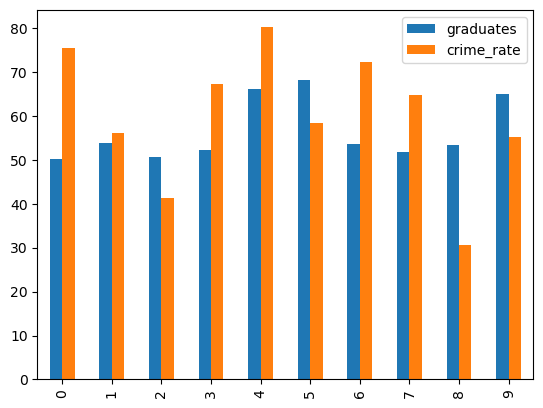

In [24]:
#Visualizing the first 10 rows of dataset using bargraph
df=data[['graduates','crime_rate']]
df.iloc[0:10 : ].plot(kind='bar')

<Axes: >

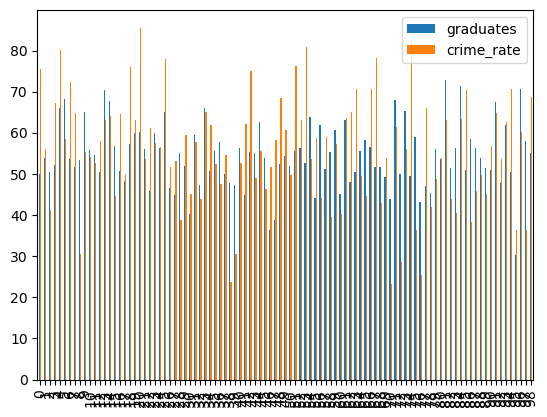

In [26]:
#visualizing the entire dataset
df.plot(kind='bar')

<Axes: >

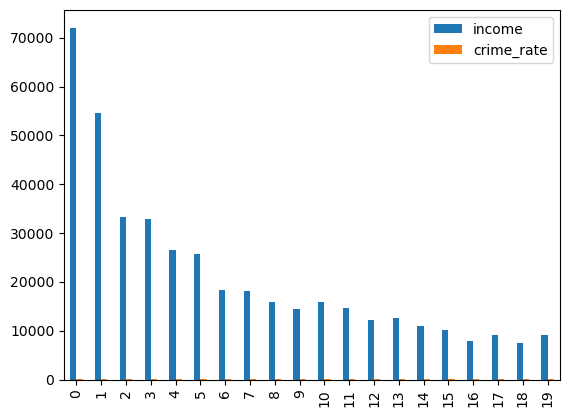

In [43]:
df=data[['income','crime_rate']]
df.iloc[:20, : ].plot(kind='bar')

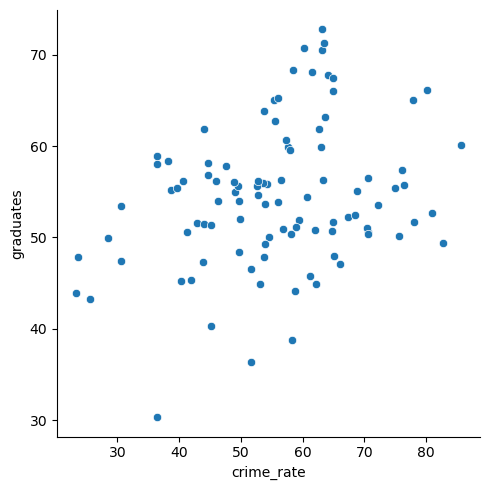

In [49]:
#viualizing using scatterplot/relational plt
snr.relplot(x='crime_rate',y='graduates',data=data)

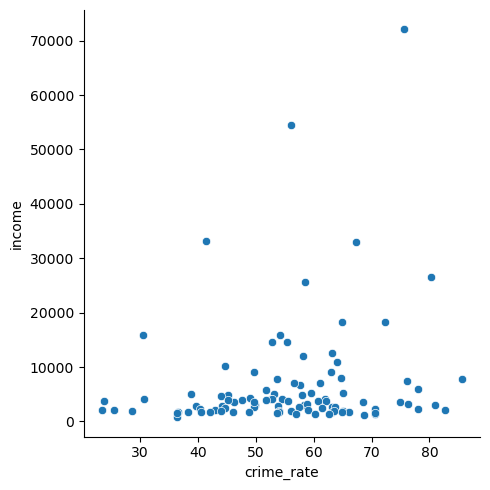

In [51]:
snr.relplot(x='crime_rate',y='income',data=data)

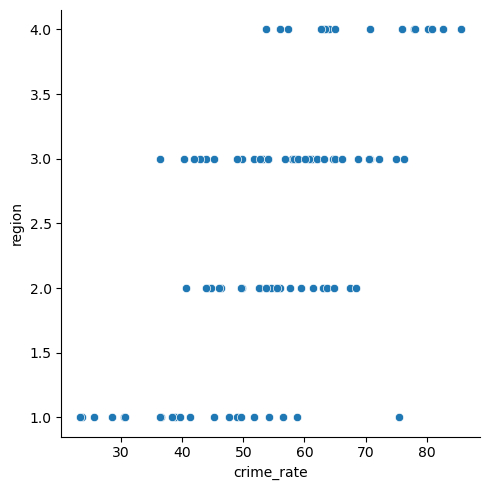

In [59]:
snr.relplot(x='crime_rate',y='region',data=data)

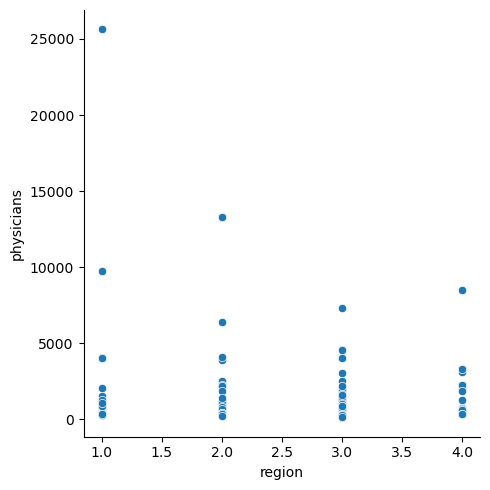

In [61]:
snr.relplot(x='region',y='physicians',data=data)

In [65]:
#dividing the data into independent and dependent variable
x=data.drop(['crime_rate'],axis=1)
y=data['crime_rate']

In [67]:
x.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4


In [78]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)  # here 80% of data used for training the model and 15 % data used for tesing the model

In [80]:
#creating suprivised linear regression model using linear regression algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [84]:
# training the model
model.fit(x_train,y_train)  # fit() allows model to learn

LinearRegression()

In [86]:
#prediction using the model
y_hat=model.predict(x_test)

In [88]:
#accuracy of the model ,r2_score is a matrix to calculate the accuracy of the regression model
from sklearn.metrics import r2_score
score=r2_score(y_test,y_hat)

In [90]:
print(score)  # error component

0.11036585220182649


In [92]:
model.score(x,y)  #accuracy of the model

0.40081759045128174